In [3]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv("/Users/soonleqi/Downloads/train.csv")
test = pd.read_csv("/Users/soonleqi/Downloads/test.csv")
sample = pd.read_csv("/Users/soonleqi/Downloads/sample_submission.csv")

In [5]:
df['date'] = pd.to_datetime(df['date'])

In [6]:
gbl = globals()
def split():
    for i in range(1,11):
        for y in range(1,51):
            gbl['df'+'{}_{}'.format(i,y)] = df[(df['store']==i) & (df['item']== y)][['date','sales']].set_index('date')
            
split()

In [7]:
df1_1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1826 entries, 2013-01-01 to 2017-12-31
Data columns (total 1 columns):
sales    1826 non-null int64
dtypes: int64(1)
memory usage: 28.5 KB


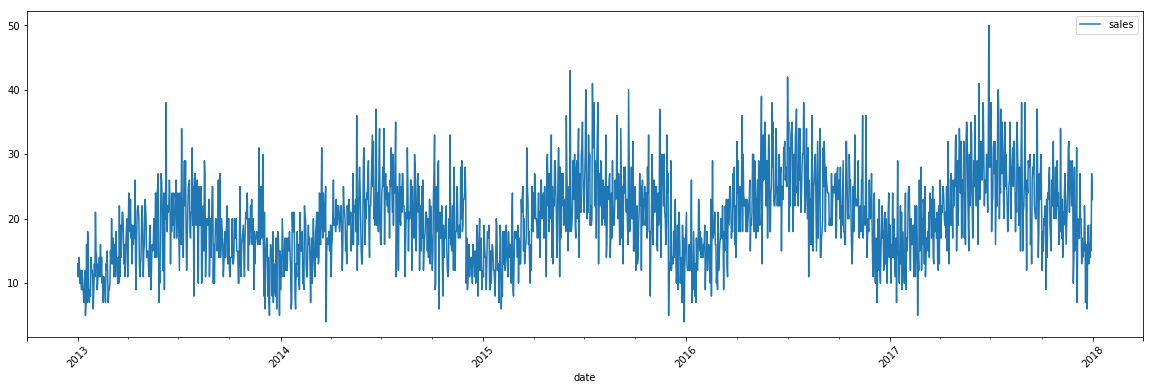

In [8]:
from matplotlib import pyplot
from pandas import datetime

df1_1
df1_1.plot(figsize=(20, 6))
pyplot.xticks(rotation=45)
pyplot.show()

In [9]:
import itertools

# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [10]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(df1_1,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            
        except:
            continue

In [11]:
import statsmodels.api as sm
mod = sm.tsa.statespace.SARIMAX(df1_1,
                                order=(1, 1, 1),
                                seasonal_order=(1, 0, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

/Users/soonleqi/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0557      0.027      2.093      0.036       0.004       0.108
ma.L1         -0.9089      0.011    -80.098      0.000      -0.931      -0.887
ar.S.L12       0.5004      0.136      3.670      0.000       0.233       0.768
ma.S.L12      -0.6037      0.126     -4.786      0.000      -0.851      -0.356
sigma2        28.8972      0.901     32.057      0.000      27.130      30.664


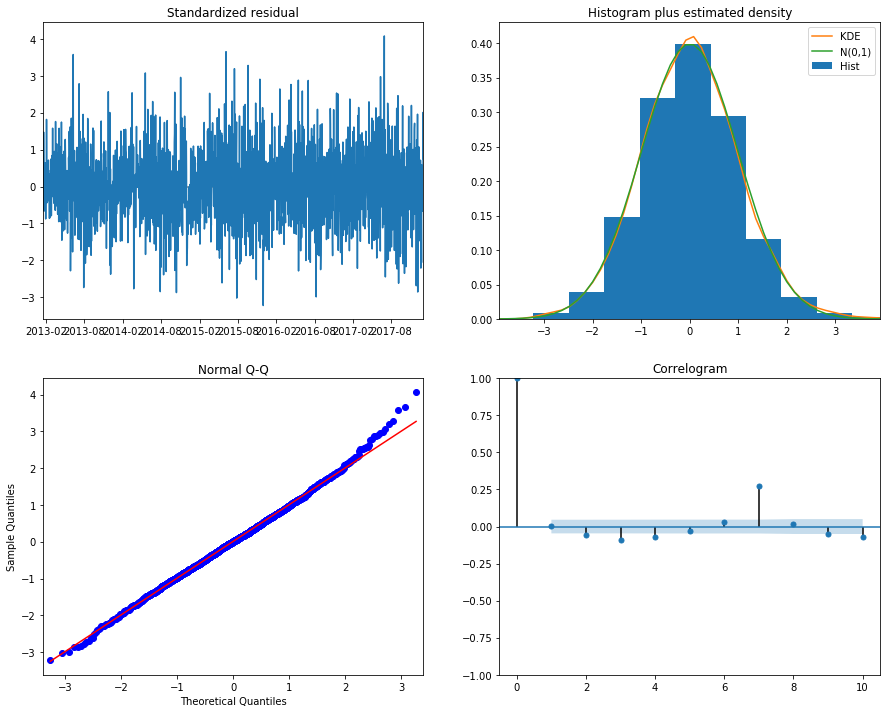

In [12]:
results.plot_diagnostics(figsize=(15, 12))
pyplot.show()

In [13]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()

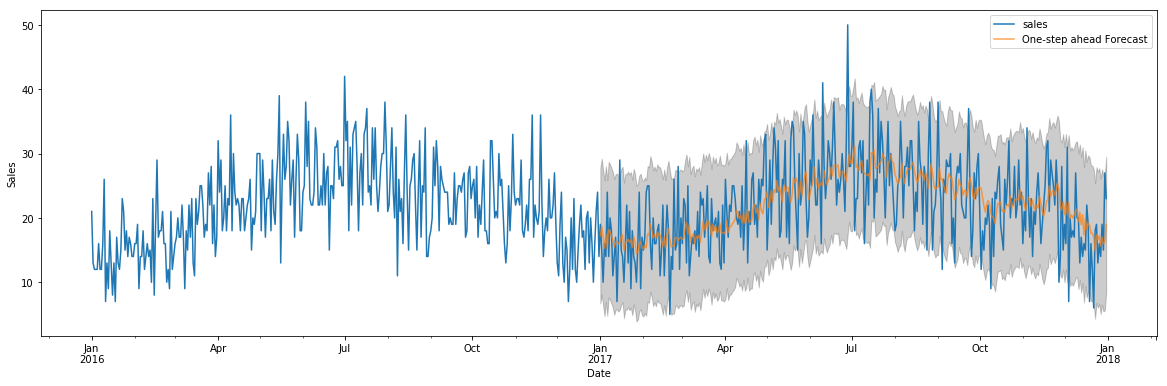

In [14]:
ax = df1_1['2016':].plot(label='observed',figsize=(20, 6))
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Sales')
pyplot.legend()

pyplot.show()

In [15]:
y_forecasted = pred.predicted_mean
y_truth = df1_1['2017-01-01':]

# Compute the mean square error
mse = ((y_forecasted - y_truth['sales']) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 33.32


In [16]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=True)
pred_ci = pred.conf_int()

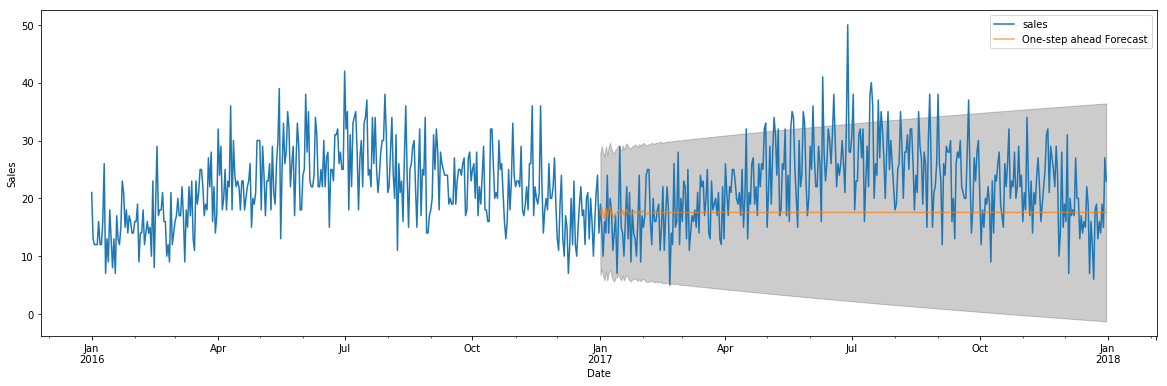

In [17]:
ax = df1_1['2016':].plot(label='observed',figsize=(20, 6))
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Sales')
pyplot.legend()

pyplot.show()

In [18]:
y_forecasted = pred.predicted_mean
y_truth = df1_1['2017-01-01':]

# Compute the mean square error
mse = ((y_forecasted - y_truth['sales']) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 69.49


In [19]:
pred_uc = results.get_forecast(steps=90)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

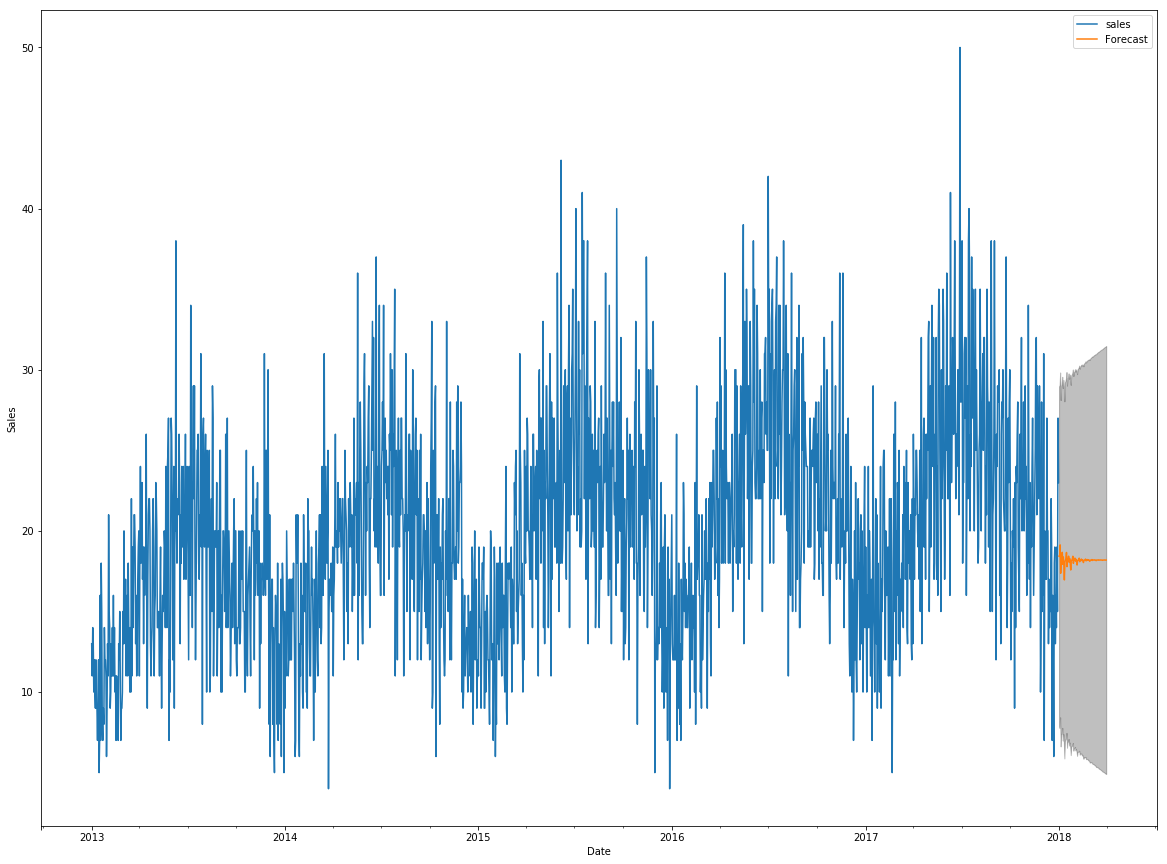

In [20]:
ax = df1_1.plot(label='observed', figsize=(20, 15))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Sales')

pyplot.legend()
pyplot.show()

In [21]:
pred_uc.predicted_mean.head()

2018-01-01    18.432256
2018-01-02    18.411790
2018-01-03    19.131931
2018-01-04    17.372539
2018-01-05    18.175336
Freq: D, dtype: float64

In [22]:
test[(test['store']== 1) & (test['item']==1)].describe()

,id,store,item
count,90.000000,90.0,90.0
mean,44.500000,1.0,1.0
std,26.124701,0.0,0.0
min,0.000000,1.0,1.0
25%,22.250000,1.0,1.0
50%,44.500000,1.0,1.0
75%,66.750000,1.0,1.0
max,89.000000,1.0,1.0


In [23]:
def modelling():
    for i in range(1,11):
        for y in range(1,51):
            mod = sm.tsa.statespace.SARIMAX(gbl['df'+'{}_{}'.format(i,y)],
                                            order=(1, 1, 1),
                                            seasonal_order=(1, 0, 1, 12),
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            # print(results.summary().tables[1])
            
            pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=True)
            pred_ci = pred.conf_int()
            
            y_forecasted = pred.predicted_mean
            y_truth = df1_1['2017-01-01':]

            # Compute the mean square error
            mse = ((y_forecasted - y_truth['sales']) ** 2).mean()
            print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
            
            pred_uc = results.get_forecast(steps=90)

            # Get confidence intervals of forecasts
            pred_ci = pred_uc.conf_int()
            
            gbl['score'+'{}_{}'.format(i,y)] = pred_uc.predicted_mean

modelling()

The Mean Squared Error of our forecasts is 69.49
The Mean Squared Error of our forecasts is 623.88
The Mean Squared Error of our forecasts is 83.54
The Mean Squared Error of our forecasts is 65.24
The Mean Squared Error of our forecasts is 104.12
The Mean Squared Error of our forecasts is 662.29
The Mean Squared Error of our forecasts is 516.6
The Mean Squared Error of our forecasts is 1666.99
The Mean Squared Error of our forecasts is 308.75
The Mean Squared Error of our forecasts is 1415.92
The Mean Squared Error of our forecasts is 1123.67
The Mean Squared Error of our forecasts is 1019.58
The Mean Squared Error of our forecasts is 1938.83
The Mean Squared Error of our forecasts is 599.77
The Mean Squared Error of our forecasts is 2307.0
The Mean Squared Error of our forecasts is 54.02
The Mean Squared Error of our forecasts is 57.7
The Mean Squared Error of our forecasts is 2091.46
The Mean Squared Error of our forecasts is 153.83
The Mean Squared Error of our forecasts is 262.65
T

In [316]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90180 entries, 0 to 89
Data columns (total 2 columns):
date    90180 non-null object
item    90180 non-null float64
dtypes: float64(1), object(1)
memory usage: 2.1+ MB


In [133]:
records = []
for i in range(1,11):
    for y in range(1,51):
        x = ['score'+ str(i) + '_' + str(y)]
        records.append(x)

In [314]:
from itertools import chain
record = list(chain.from_iterable(records))

def append_all():
    score_mixed = pd.Series()
    for i in range(1,11):
        for y in range(1,51):
            score_mixed = score_mixed.append(gbl['score'+'{}_{}'.format(i,y)])
append_all()

In [285]:
def append_all():
    score_mixed = pd.Series()
    for i in range(1,11):
        for y in range(1,51):
            (gbl['score'+'{}_{}'.format(i,y)]).to_frame
append_all()

In [278]:
path = '/Users/soonleqi/Analytics_files/Store'
def append_all():
    score_mixed = pd.Series()
    for i in range(1,11):
        for y in range(1,51):
            score_mixed.append(gbl['score'+'{}_{}'.format(i,y)]).to_csv('score'+'{}_{}'.format(i,y))
append_all()

In [309]:
for i in record:
        data = pd.read_csv('{}'.format(i), names = ['date','item'])
        df = df.append(data)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 90180 entries, 0 to 89
Data columns (total 2 columns):
date    90180 non-null object
item    90180 non-null float64
dtypes: float64(1), object(1)
memory usage: 2.1+ MB


In [311]:
df.head()

,date,item
0,2018-01-01,18.432256
1,2018-01-02,18.411790
2,2018-01-03,19.131931
3,2018-01-04,17.372539
4,2018-01-05,18.175336
